In [1]:
# Gabriela Aguilar
# Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
# Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.


# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [2]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, accuracy_score, mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia
plt.rcParams["figure.figsize"] = [10,5] # Tamaño de gráficas

In [4]:
# Carga de los Datos

# Acceso a la base de datos cargada a la repo de GitHub
datos = pd.read_csv("https://github.com/gabrielaaguiv5/ProjectI/raw/main/data/raw/google_review_ratings.csv")

datos.head(10)


,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [5]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()
print()
print('Datos:', datos.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

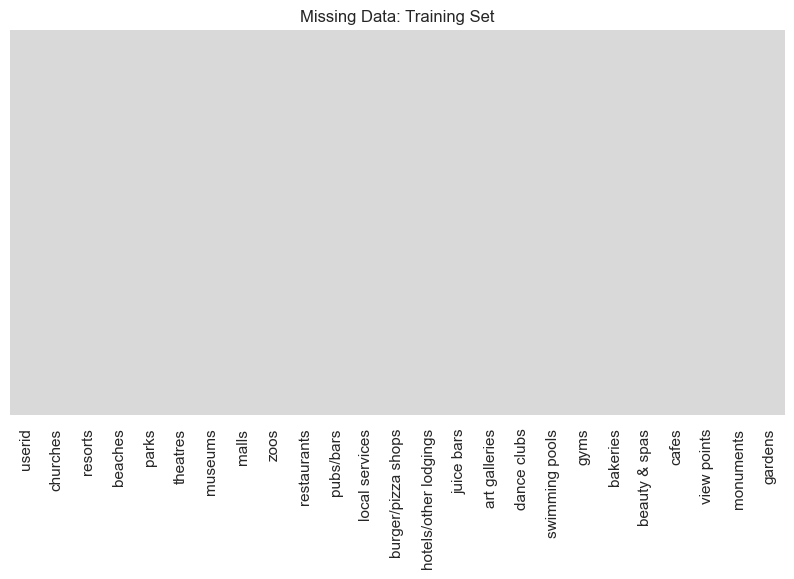

In [6]:
# Heatmap
sns.heatmap(datos.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [7]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


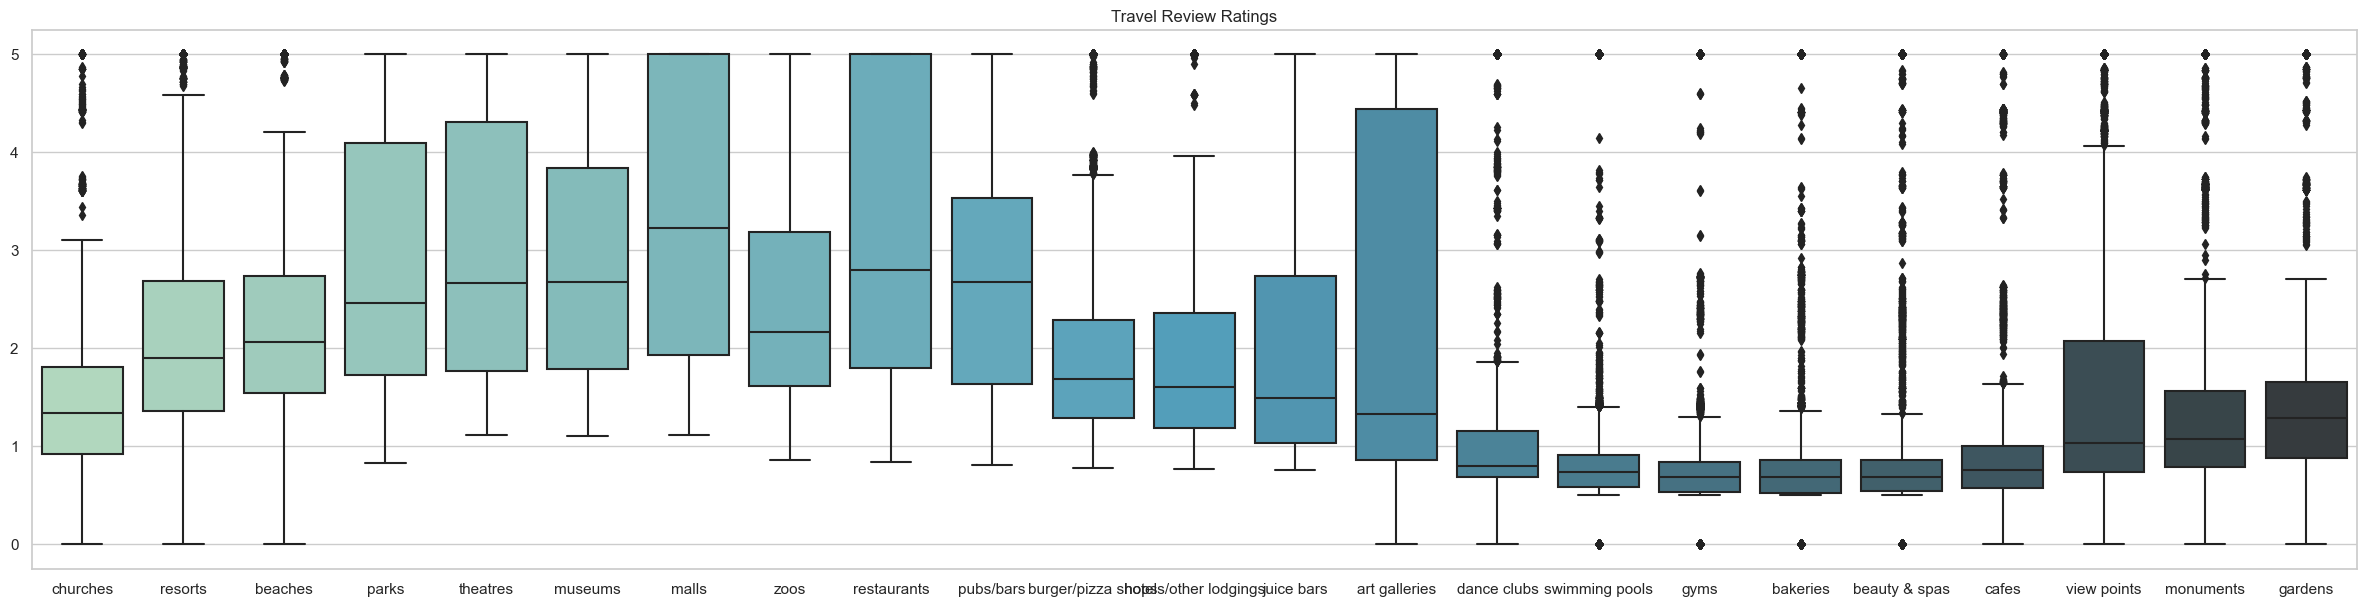

In [8]:
plt.figure(figsize = (30,7))
sns.boxplot(data = datos, palette= 'GnBu_d').set_title('Travel Review Ratings')
plt.show()

Las categorías 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens', 'churches', 'resorts', 'beaches', 'burger/pizza shops' y 'hotels/other lodgings' presentan valores atípicos que se desvían del rango habitual de calificaciones dentro de estas categorías.

Adicionalmente, las categorías 'malls', 'restaurants' y 'art galleries' muestran indicios de calificaciones elevadas, con algunos valores que superan el rango medio.

In [9]:
# Identificación de valores duplicados

print('Filas duplicadas:', datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

Filas duplicadas: 0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [10]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
# Aplicando función para corregir datos según error code tras tratar de convertir a columnas_numericas

def limpiezaNull(x):
    try:
        # Reemplazando caractéres no numéricos (excepto por '.') por un espacio vacio
        return float(str(x).replace('\t', '').replace(' ',''))
    except ValueError:
        # En casos en que el retorno es Nan
        return np.nan

datos[columnas_numericas] = datos[columnas_numericas].apply(pd.to_numeric, errors='coerce').fillna(0)


In [11]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [12]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Avg_Churches',
    'resorts': 'Avg_Resorts',
    'beaches': 'Avg_Beaches',
    'parks': 'Avg_Parks',
    'theatres': 'Avg_Theatres',
    'museums': 'Avg_Museums',
    'malls': 'Avg_Malls',
    'zoos': 'Avg_Zoo',
    'restaurants': 'Avg_Restaurants',
    'pubs/bars': 'Avg_Pubs/bars',
    'local services': 'Avg_Local services',
    'burger/pizza shops': 'Avg_Burger/pizza shops',
    'hotels/other lodgings': 'Avg_Hotels/other lodgings',
    'juice bars': 'Avg_Juice bars',
    'art galleries': 'Avg_Art galleries',
    'dance clubs': 'Avg_Dance clubs',
    'swimming pools': 'Avg_Swimming pools',
    'gyms': 'Avg_Gyms',
    'bakeries': 'Avg_Bakeries',
    'beauty & spas': 'Avg_Beauty & spas',
    'cafes': 'Avg_Cafes',
    'view points': 'Avg_View points',
    'monuments': 'Avg_Monuments',
    'gardens': 'Avg_Gardens',
}, inplace=True)

In [13]:
# Revisión de datos actualizados
datos.info()
print()
print("Null Data:",datos.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

In [14]:
# 3. Basic Info
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = [col for col in datos.columns if col.startswith("Avg")]

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Las categorias con promedios de ratings más altos son Avg_Malls, Avg_Restaurants, y Avg_Parks.

Las categorias con promedios de ratings más bajos son Avg_Gyms, Avg_Swimming pools, y Avg_Dance clubs.



In [15]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+-----------------------+----------------------------+---------+
| Variable                  |   Varianza |   Desviación estándar |   Coeficiente de variación |   Rango |
+===========================+============+=======================+============================+=========+
| Avg_Churches              |   0.684929 |              0.827604 |                    56.8519 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Resorts               |   2.02048  |              1.42144  |                    61.2766 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Beaches               |   1.55704  |              1.24782  |                    50.1265 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Parks                 |   1.7139   |    

In [16]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

headers = ["Variable", "Asimetría", "Curtosis"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------+------------+
| Variable                  |   Asimetría |   Curtosis |
+===========================+=============+============+
| Avg_Churches              |    1.66658  |  4.76233   |
+---------------------------+-------------+------------+
| Avg_Resorts               |    0.883645 | -0.397317  |
+---------------------------+-------------+------------+
| Avg_Beaches               |    1.08485  | -0.11516   |
+---------------------------+-------------+------------+
| Avg_Parks                 |    0.706732 | -0.979327  |
+---------------------------+-------------+------------+
| Avg_Theatres              |    0.487032 | -1.26603   |
+---------------------------+-------------+------------+
| Avg_Museums               |    0.558141 | -1.07159   |
+---------------------------+-------------+------------+
| Avg_Malls                 |    0.017513 | -1.60457   |
+---------------------------+-------------+------------+
| Avg_Zoo                   |  

In [17]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+----------------+----------------+----------------+
| Variable                  |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+===========================+================+================+================+
| Avg_Churches              |           0.92 |          1.34  |         1.81   |
+---------------------------+----------------+----------------+----------------+
| Avg_Resorts               |           1.36 |          1.905 |         2.6825 |
+---------------------------+----------------+----------------+----------------+
| Avg_Beaches               |           1.54 |          2.06  |         2.74   |
+---------------------------+----------------+----------------+----------------+
| Avg_Parks                 |           1.73 |          2.46  |         4.0925 |
+---------------------------+----------------+----------------+----------------+
| Avg_Theatres              |           1.77 |          2.67  |         4.3125 |
+---------------------------

# **3. Asignación de Datos para Modelo de ML:**

Se asignan valores correspondientes a "Ciudades". Teniendo en cuenta la información suministrada por la base de datos (la cual indica que los ratings corresponden a ciudades de Europa https://archive.ics.uci.edu/dataset/485/tarvel+review+ratings), se asignan nombres de ciudades de forma aleatoria con el fin de enfocar el análisis en ubicaciones específicas, facilitando así la construcción del modelo predictivo final.

In [18]:
# Agregar ciudades al random

city_list = ['London', 'Paris', 'Rome', 'Berlin', 'Barcelona', 'Amsterdam', 'Vienna', 'Prague', 'Madrid', 'Lisbon']
datos['City'] = [random.choice(city_list) for _ in range(len(datos))]
columnas = ['City'] + [col for col in datos.columns if col != 'City'] # Organizar ciudades al inicio
datos = datos[columnas]

datos['City'] = datos['City'].astype('category')

In [19]:
datos.head(10) # Nuevo orden de columnas

,City,Unique user id,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
0,Vienna,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,Vienna,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,London,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,Paris,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,Rome,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,Lisbon,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,Paris,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,Barcelona,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,Berlin,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,London,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import os # Extrayendo una nueva versión de los datos, sin valores nulos e incluyendo las ciudades.

os.makedirs('data', exist_ok=True)
datos.to_csv('data/my_data.csv', index=False)

file_path = os.path.abspath('data/my_data.csv')
print(f"Saved to: {file_path}")

Saved to: C:\Users\gabri\AppData\Local\Programs\Microsoft VS Code\data\my_data.csv


# **4. Generación de Gráficas:**

*   Creación de gráficas para el análisis de datos.

In [21]:
# Melt a las columnas con ratings, manteniendo City y User ID como identificador de variables
df_melted = datos.melt(
    id_vars=['City', 'Unique user id'],
    var_name='Category',
    value_name='Rating'
)

# Resumiendo nombres para facilitar Melt
df_melted['Category'] = df_melted['Category'].str.replace('Avg_', '', regex=False)
df_melted['Rating'] = df_melted['Rating'].round(0).astype(int)

df_melted

,City,Unique user id,Category,Rating
0,Vienna,User 1,Churches,0
1,Vienna,User 2,Churches,0
2,London,User 3,Churches,0
3,Paris,User 4,Churches,0
4,Rome,User 5,Churches,0
...,...,...,...,...
130939,Lisbon,User 5452,Gardens,2
130940,Lisbon,User 5453,Gardens,1
130941,Rome,User 5454,Gardens,1
130942,Berlin,User 5455,Gardens,1


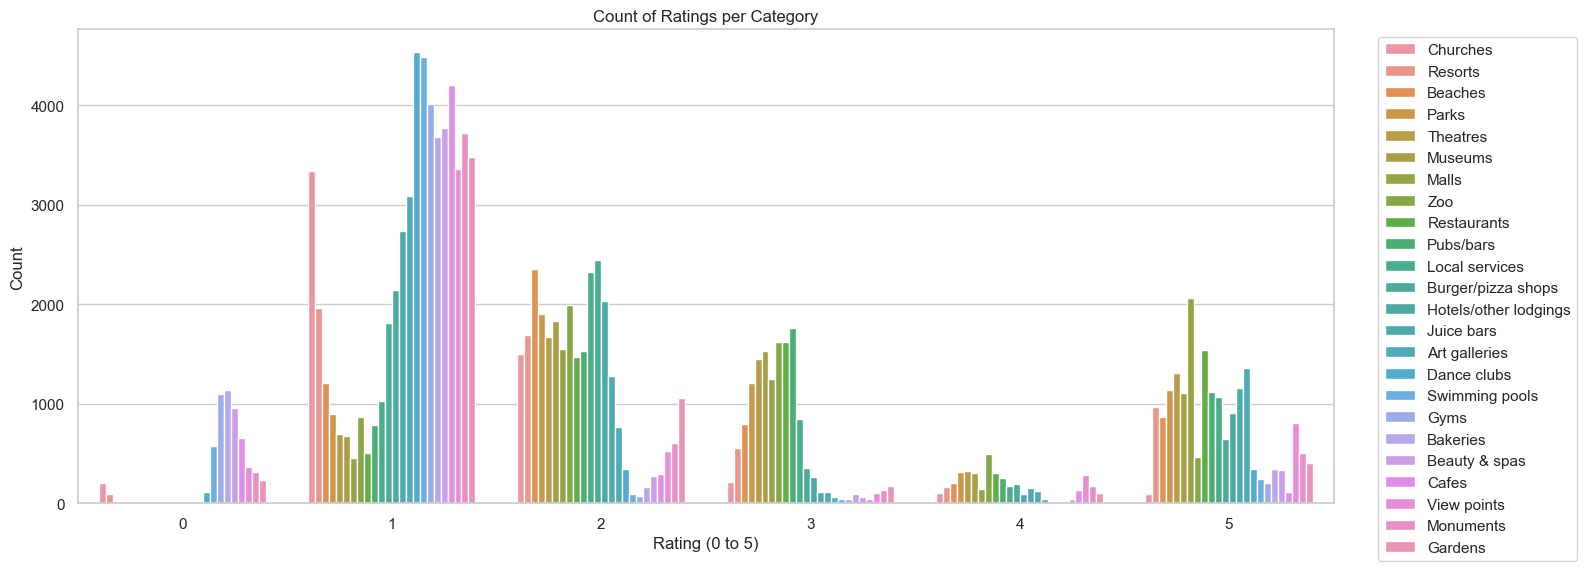

In [22]:
# Crear un countplot incluyendo todas las categorías
plt.figure(figsize=(16, 6))
sns.countplot(data=df_melted, x='Rating', hue='Category') # Clasificando por Ratings

plt.title('Count of Ratings per Category')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

Se observa una concentración de calificaciones bajas en muchas categorías. En particular, Dance Clubs, Swimming Pools y Gyms muestran una alta concentración de calificaciones entre 1 y 2. De lo contrario, Malls, Restaurants y Theatres presentan una distribución más equilibrada y una mayor proporción de calificaciones altas (3–5), lo que indica un mejor desempeño. 

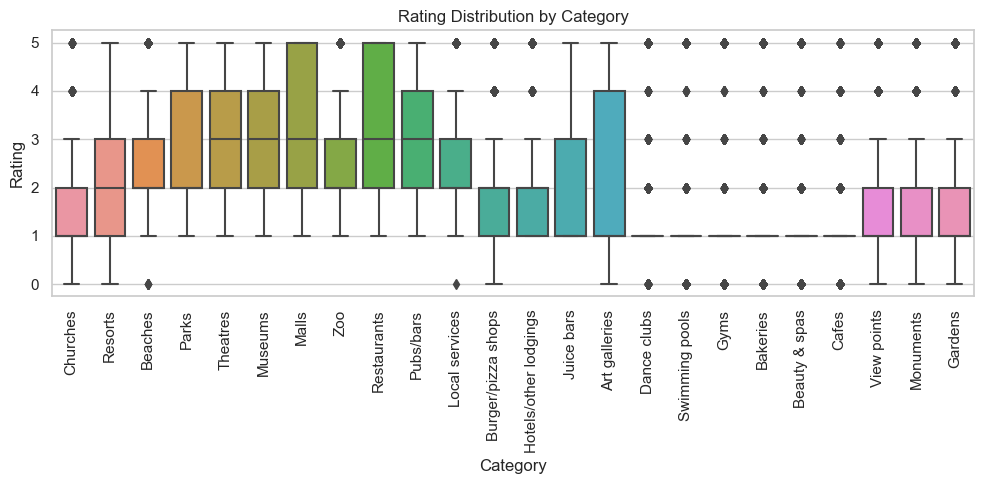

In [23]:
# Crear un boxplot incluyendo todas las categorías
sns.boxplot(data=df_melted, x='Category', y='Rating') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.tight_layout()
plt.show()

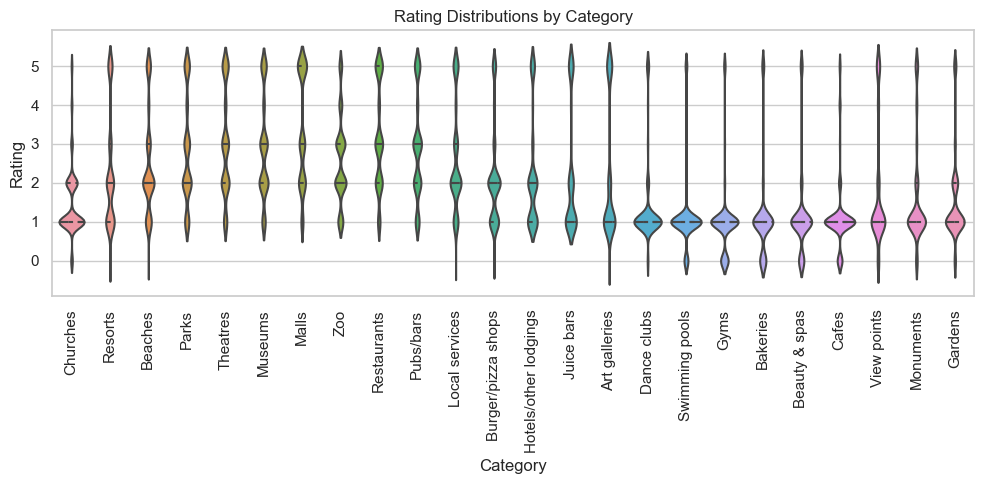

In [24]:
# Crear un violinplot incluyendo todas las categorías, para comparar la distribución de ratings entre las categorías.
sns.violinplot(data=df_melted, x='Category', y='Rating', inner='quartile') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distributions by Category')
plt.tight_layout()
plt.show()

Esta gráfica muestra la densidad de las valoraciones en cada categoría. Por ejemplo, Malls y Restaurants presentan una mayor concentración de valoraciones de rango medio-alto, mientras que Dance Clubs, Swimming Pools y Gyms concentran la densidad en valores bajos. De igual forma, Cafes y Beauty & Spas muestran una densidad enfocada en las calificaciones más bajas.

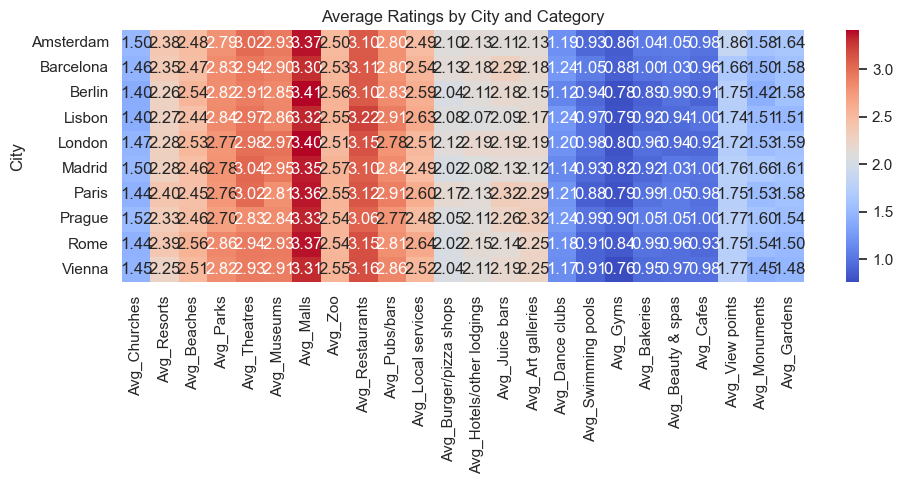

In [25]:
# Visualización con heatmap del promedio de ratings en las diferentes categorías y ciudades.
df_avg = datos.drop(columns='Unique user id').groupby('City').mean()
sns.heatmap(df_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Ratings by City and Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

De acuerdo con el comportamiento observado, Malls y Restaurants registran de forma consistente las calificaciones promedio más altas en diversas ciudades, destacando especialmente Ámsterdam y Viena, que muestran puntuaciones relativamente superiores en estas categorías.

En cambio, categorías como Swimming Pools y Dance Clubs presentan calificaciones consistentemente bajas, sobre todo en ciudades como Berlín y Madrid.

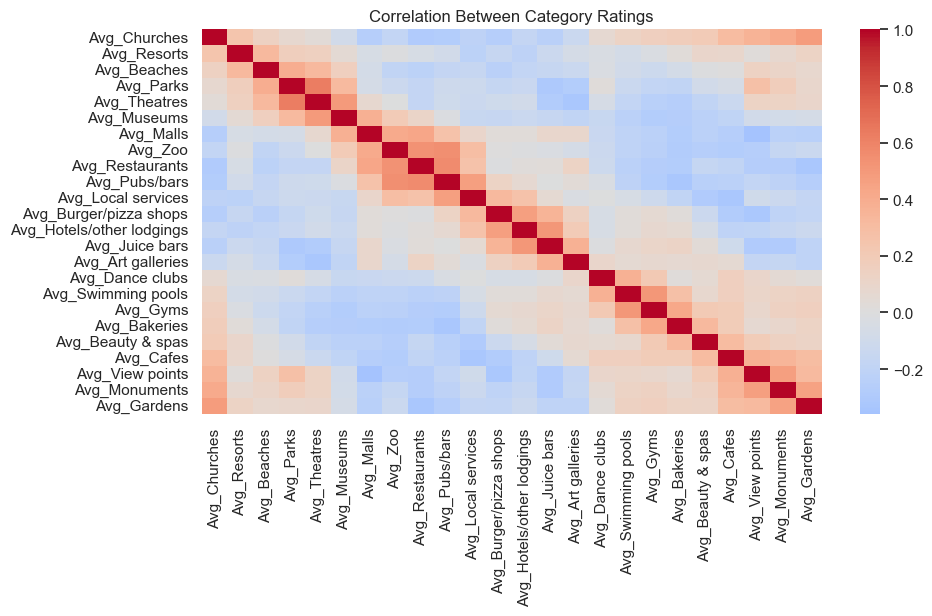

In [26]:
# Visualización con heatmap de la relación entre los ratings de las diferentes categorías.
corr = datos.drop(columns=['City', 'Unique user id']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Between Category Ratings')
plt.show()

Se observa una correlación marcada entre Malls, Restaurants, Parks y Museums, lo que sugiere que los usuarios los valoran de forma similar. Por su parte, Swimming Pools, Cafes y Dance Clubs presentan correlaciones débiles con el resto, reflejando preferencias más independientes o un desagrado más común. Finalmente, Art Galleries y Juice Bars aparecen aislados, lo que indica gustos muy específicos.

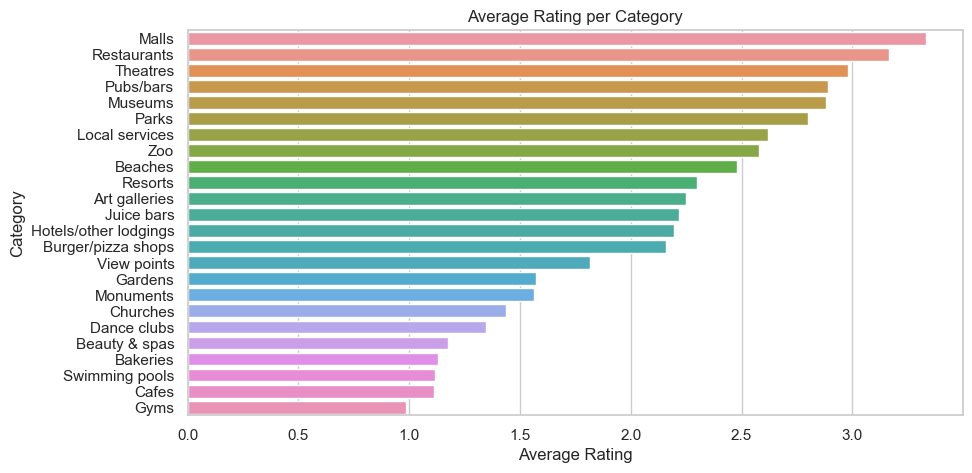

In [27]:
# Crear barplot horizontal relacionando los ratings y todas las categorías.
category_means = df_melted.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# **5. Machine Learning:**


In [28]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   City                       5456 non-null   category
 1   Unique user id             5456 non-null   category
 2   Avg_Churches               5456 non-null   float64 
 3   Avg_Resorts                5456 non-null   float64 
 4   Avg_Beaches                5456 non-null   float64 
 5   Avg_Parks                  5456 non-null   float64 
 6   Avg_Theatres               5456 non-null   float64 
 7   Avg_Museums                5456 non-null   float64 
 8   Avg_Malls                  5456 non-null   float64 
 9   Avg_Zoo                    5456 non-null   float64 
 10  Avg_Restaurants            5456 non-null   float64 
 11  Avg_Pubs/bars              5456 non-null   float64 
 12  Avg_Local services         5456 non-null   float64 
 13  Avg_Burger/pizza shops     5456 n

In [29]:
df = datos.drop(columns=['Unique user id'])

# Regresión logística

## Preparación, identificación y entrenamiento de los Datos

In [30]:
x = df.drop('City', axis = 1) # seleccionando todo excepto 'City'

# Crear la variable objetivo
y = df['City'] # y es la columna a predecir

# Dividiendo para la predicción
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101, stratify=y)

In [31]:
df.shape

(5456, 25)

In [32]:
x_train.shape, y_train.shape

((4364, 24), (4364,))

In [33]:
x_train

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
301,2.21,2.47,2.53,2.01,2.39,3.90,4.22,2.87,3.47,3.10,...,3.48,0.94,0.92,0.78,0.84,0.82,0.86,4.22,5.00,1.71
676,0.00,0.00,1.53,1.43,1.42,1.43,1.48,1.48,2.72,2.73,...,5.00,0.81,0.80,5.00,0.92,0.00,0.00,0.00,0.00,0.00
3668,0.97,3.83,3.79,2.74,2.69,2.29,2.43,1.79,1.80,5.00,...,1.06,0.75,0.74,0.74,0.77,1.00,0.99,0.99,0.96,0.95
5118,0.78,5.00,1.54,2.10,2.95,5.00,5.00,1.57,5.00,1.51,...,5.00,0.74,0.73,0.74,2.21,1.15,0.79,0.77,0.76,0.78
166,1.32,1.68,1.68,1.69,3.11,4.44,5.00,5.00,5.00,5.00,...,5.00,0.59,0.58,0.59,0.73,0.63,1.15,1.12,1.10,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,3.64,2.67,2.65,2.66,2.50,1.91,1.91,1.37,1.36,1.36,...,0.77,0.77,5.00,0.86,0.86,0.86,0.76,0.76,5.00,3.62
779,1.95,2.89,2.01,2.03,2.01,2.01,2.03,1.96,2.08,1.78,...,2.32,1.58,1.41,1.40,1.41,5.00,0.61,1.96,1.94,1.94
4638,0.55,0.60,5.00,1.32,1.35,4.82,5.00,4.21,5.00,2.92,...,0.82,0.80,0.80,0.84,0.86,0.55,0.51,0.00,0.52,0.58
2269,1.78,1.82,1.83,3.26,5.00,5.00,5.00,2.01,1.78,2.61,...,2.00,0.51,0.00,0.00,0.00,0.51,0.00,1.08,1.07,1.08


In [34]:
y_train

301     Amsterdam
676        Prague
3668        Paris
5118         Rome
166        Prague
          ...    
1781       Lisbon
779        Vienna
4638       Lisbon
2269         Rome
5405        Paris
Name: City, Length: 4364, dtype: category
Categories (10, object): ['Amsterdam', 'Barcelona', 'Berlin', 'Lisbon', ..., 'Paris', 'Prague', 'Rome', 'Vienna']

In [35]:
x_test.shape, y_test.shape

((1092, 24), (1092,))

In [36]:
x_test

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
4600,1.29,1.30,4.76,4.14,5.00,5.00,2.85,2.42,1.70,1.70,...,0.86,1.08,0.73,0.56,0.55,0.57,0.71,5.00,1.16,1.30
5170,1.42,1.44,1.47,2.60,2.62,3.22,3.23,5.00,5.00,5.00,...,1.11,0.53,0.50,0.00,0.50,3.29,0.56,1.47,1.43,1.42
4689,0.84,5.00,1.46,1.47,1.49,1.54,5.00,4.10,5.00,5.00,...,0.86,0.65,0.63,0.64,0.66,0.68,1.13,0.84,0.81,0.82
4271,1.41,1.41,1.42,1.45,1.48,2.66,3.29,3.29,5.00,5.00,...,0.86,1.04,0.00,0.00,0.00,0.00,0.00,5.00,0.80,1.45
5275,1.33,1.38,1.38,1.80,1.79,1.78,1.80,2.67,2.66,2.66,...,5.00,5.00,0.52,0.51,0.52,0.65,1.36,1.48,1.32,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,2.99,...,5.00,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84,0.84
2749,2.60,2.59,2.59,2.37,1.75,1.75,1.21,1.19,1.20,1.21,...,0.86,5.00,1.02,1.02,5.00,5.00,5.00,5.00,3.69,3.70
1640,1.32,2.34,2.35,1.87,1.84,1.85,1.88,1.90,2.71,2.41,...,5.00,0.00,0.00,0.00,0.00,0.50,1.32,1.30,1.29,1.30
3274,1.19,2.06,5.00,5.00,4.29,4.29,5.00,1.83,2.52,2.50,...,1.42,1.76,0.71,0.00,0.00,0.00,0.52,0.53,0.58,1.17


## Modelo

In [37]:
# Fit
# Importando modelo
from sklearn.linear_model import LogisticRegression

# Creando variable para modelo
lreg = LogisticRegression()

# Asignando datos de entrenamiento al modelo
lreg.fit(x_train, y_train)

LogisticRegression()

In [38]:
dir(lreg)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_

In [39]:
lreg.feature_names_in_

array(['Avg_Churches', 'Avg_Resorts', 'Avg_Beaches', 'Avg_Parks',
       'Avg_Theatres', 'Avg_Museums', 'Avg_Malls', 'Avg_Zoo',
       'Avg_Restaurants', 'Avg_Pubs/bars', 'Avg_Local services',
       'Avg_Burger/pizza shops', 'Avg_Hotels/other lodgings',
       'Avg_Juice bars', 'Avg_Art galleries', 'Avg_Dance clubs',
       'Avg_Swimming pools', 'Avg_Gyms', 'Avg_Bakeries',
       'Avg_Beauty & spas', 'Avg_Cafes', 'Avg_View points',
       'Avg_Monuments', 'Avg_Gardens'], dtype=object)

In [40]:
lreg.get_params(())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
y_pred_lreg = lreg.predict(x_test) # Predicción

In [42]:
y_pred_lreg

array(['London', 'Madrid', 'Lisbon', ..., 'Paris', 'London', 'Prague'],
      dtype=object)

Logistic Regression


Confusion Matrix
[[ 3  6 11 15 19  7 18 10  7  6]
 [ 5  7  8 18 16  7 26 10 15  1]
 [ 4  6 14 12 16  7 22  5 11  9]
 [ 9  8 10 19 13  6 20  7 14  8]
 [ 4  8  3 14 16  6 22 12 15  9]
 [ 7  8 10 13 13  6 24 10  9  7]
 [10  3 11 19 16  2 27 11  6  6]
 [ 6  6 12 12 15  3 21 17 11 10]
 [ 6  7 12 15 15  7 17 11 13  5]
 [ 4  4  8 11 17  6 18 14 16 11]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

   Amsterdam       0.05      0.03      0.04       102
   Barcelona       0.11      0.06      0.08       113
      Berlin       0.14      0.13      0.14       106
      Lisbon       0.13      0.17      0.15       114
      London       0.10      0.15      0.12       109
      Madrid       0.11      0.06      0.07       107
       Paris       0.13      0.24      0.17       111
      Prague       0.16      0.15      0.15       113
        Rome       0.11      0.12      0

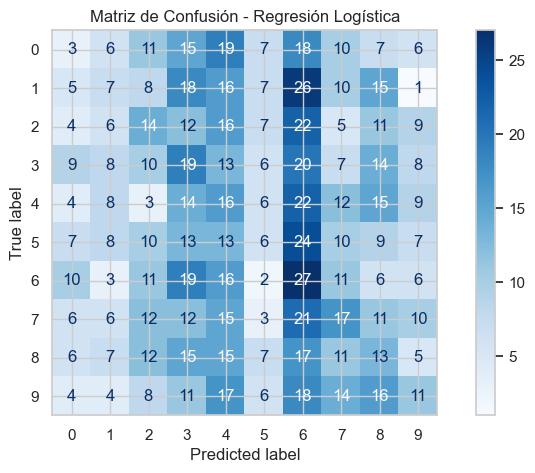

In [43]:
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred_lreg)
print(conf_matrix)
print('--' * 40)

# Reporte de Clasificación
print('Classification Report')
print(classification_report(y_test, y_pred_lreg))

# Precisión
print('--' * 40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100, 2)
print('Accuracy of the Logistic Regression model:', logreg_accuracy, '%')

# Graficar la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

## Conclusión de la Regresión Logística: el modelo presenta un rendimiento muy bajo, ya que solo acierta en 1 de cada 10 casos.

# K-Nearest Neighbors (KNN)

## Preparación y normalización de los Datos

In [44]:
# Seleccionando todas las columnas para análisis, excluyendo a las variables categóricas
categories = datos.columns.difference(['City', 'Unique user id'])

# Promedio de ratings por ciudad para establecer correlaciones
city_avg_ratings = datos.groupby('City')[categories].mean()

# Cálculo de correlación entre categorías y ciudades
correlation_with_city = city_avg_ratings.corr()
top_features = correlation_with_city.abs().mean(axis=1).sort_values(ascending=False).head(3) # Top 3 categorías cuyo valor en promedio tienen mayor correlación con las ciudades
print(top_features) # Tres categorías cuya correlación media con la ciudad es mayor

# Preparando columna objetivo a calcular
X_top3 = datos[top_features.index]
y_top3 = datos['City']

print(X_top3)
print(y_top3)


Avg_Bakeries    0.425457
Avg_Churches    0.407238
Avg_Gyms        0.387211
dtype: float64
      Avg_Bakeries  Avg_Churches  Avg_Gyms
0             0.50          0.00      0.00
1             0.50          0.00      0.00
2             0.50          0.00      0.00
3             0.50          0.00      0.00
4             0.50          0.00      0.00
...            ...           ...       ...
5451          0.69          0.91      0.66
5452          1.59          0.93      0.65
5453          0.74          0.94      0.64
5454          0.75          0.95      0.64
5455          0.78          0.95      0.63

[5456 rows x 3 columns]
0       Vienna
1       Vienna
2       London
3        Paris
4         Rome
         ...  
5451    Lisbon
5452    Lisbon
5453      Rome
5454    Berlin
5455      Rome
Name: City, Length: 5456, dtype: category
Categories (10, object): ['Amsterdam', 'Barcelona', 'Berlin', 'Lisbon', ..., 'Paris', 'Prague', 'Rome', 'Vienna']


In [45]:
# Para poder utilizar Clasificación los valores deben ser numéricos
label_encoder = LabelEncoder()
y_top3_encoded = label_encoder.fit_transform(y_top3)

# Normalización de los datos
scaler = StandardScaler()
X_scaled_top3 = scaler.fit_transform(X_top3)

## Modelo

In [46]:
# Llamado al modelo con k = 1
knn_model = KNeighborsClassifier(n_neighbors=1)

# Entrenando al modelo con las categorías identificadas
knn_model.fit(X_scaled_top3, y_top3_encoded)

# Evaluando la accuracy del modelo
accuracy_knn = knn_model.score(X_scaled_top3, y_top3_encoded)

print(f"Accuracy of the KNN model: {accuracy_knn * 100:.2f}%")

Accuracy of the KNN model: 73.19%


## Evaluando el Modelo

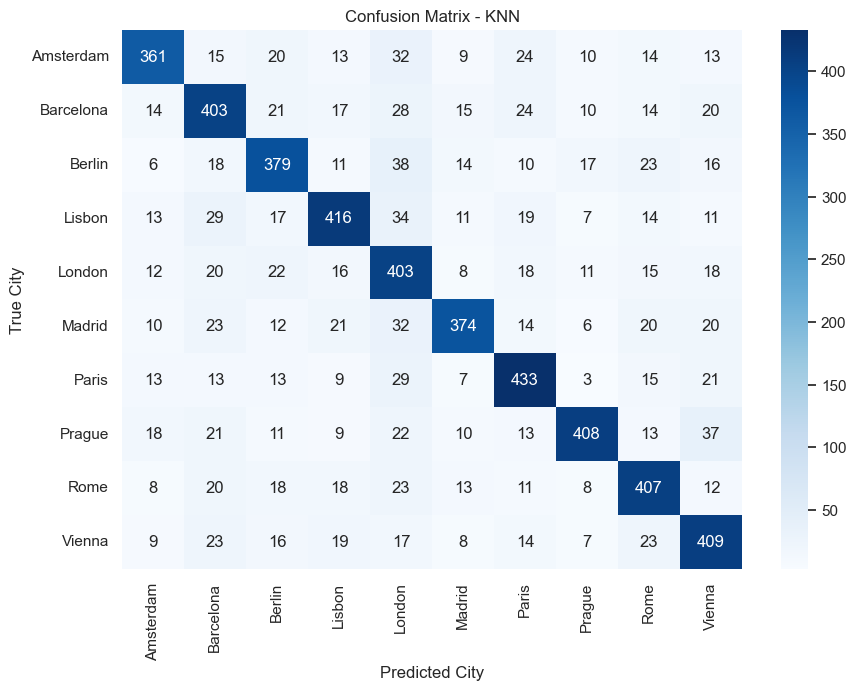

In [47]:

# Predicción de Ciudad con Modelo Entrenado
y_pred_knn = knn_model.predict(X_scaled_top3)

# Confusion matrix
cm = confusion_matrix(y_top3_encoded, y_pred_knn)

# Confusion matrix - Gráfico
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted City')
plt.ylabel('True City')
plt.show()

## Optimización de k

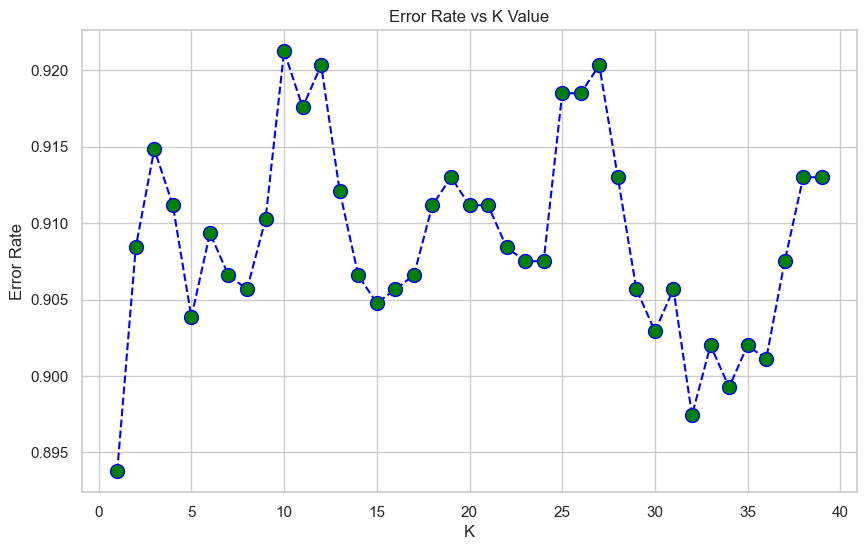

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_top3, y_top3_encoded, test_size=0.2, random_state=42)

# Function to find the ideal K value
error_rate = []

# Loop through values of k from 1 to 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate vs K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='green', markersize=10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## Valor preferible para k es 1.

# Classification

## Preparación y normalización de los Datos

In [51]:
# Aplicar a data Random Forest Classifier
clf_top3 = RandomForestClassifier(random_state=42)
clf_top3.fit(X_scaled_top3, y_top3)

# Evaluar accuracy del modelo
accuracy = clf_top3.score(X_scaled_top3, y_top3)

print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")

Accuracy of the Random Forest model: 74.76%


## Evaluando el Modelo

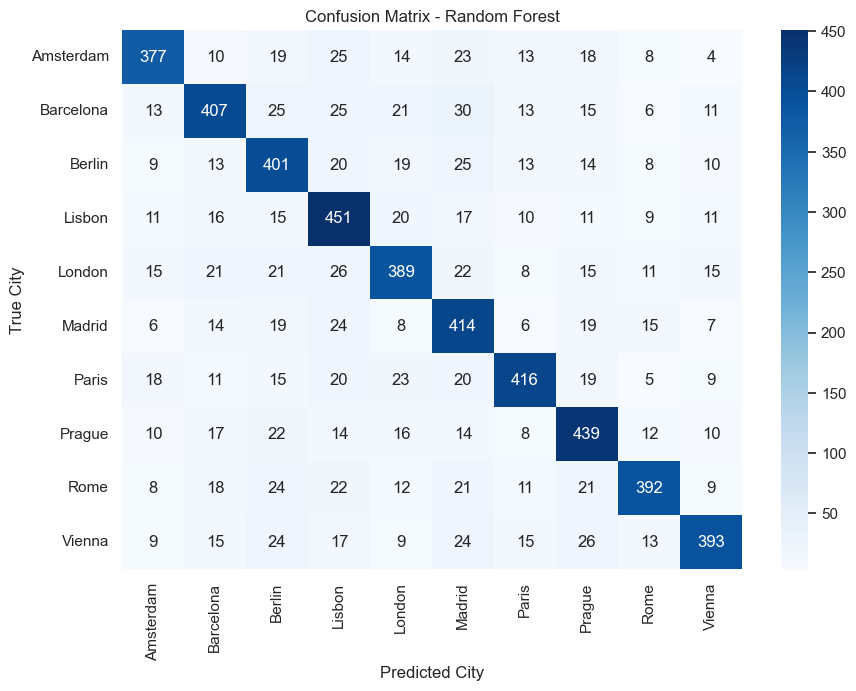

In [52]:
# Predicción con el modelo
y_pred_rf = clf_top3.predict(X_scaled_top3)

# Confusion matrix
cm_rf = confusion_matrix(y_top3, y_pred_rf)

# Confusion matrix - Gráfica
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=clf_top3.classes_, yticklabels=clf_top3.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted City')
plt.ylabel('True City')
plt.show()